In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [105]:
def find_loss(theta, input, expected, penalty: float = 0) -> float:
    m = len(input)
    predicted = input.dot(theta)
    difference = np.square(predicted - expected)

    reg = (penalty / (2 * m)) * np.sum(np.square(theta))

    J = 1 / (2 * m) * np.sum(difference) + reg
    return J

In [106]:
def validate(test_x, test_y, thetas) -> float:
    loss = 0
    for input, expected in zip(test_x, test_y):
        loss += find_loss(thetas, input, expected)
    return loss

In [107]:
def plot(j, validation_loss, title: str):
    fig, ax = plt.subplots()

    ax.plot(j, label='Training Loss')
    ax2 = ax.twinx()
    ax2.plot(validation_loss, label='Validation Loss', color='orange')
    ax.legend()
    ax.set_ylabel('Error')
    ax.set_xlabel('Iteration')
    ax.set_ylim(0, ax.get_ylim()[1])
    ax2.set_ylim(0, ax2.get_ylim()[1])

    # Combine legends for both lines
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    ax.set_title(title)
    plt.show()

In [108]:
def linear_regression(factors_list, iterations, x, y, alpha, m, test_x, test_y, penalty = 0):
    theta = np.zeros(len(factors_list)+1)

    j : list = []
    validation_loss : list[float] = []
    total_thetas : list = []
        
    for i in range(iterations):
        predictions = x.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * x.transpose().dot(errors)
        theta = theta * (1 - alpha*(penalty/m)) - sum_delta
        loss = find_loss(theta, x, y, penalty)
        j.append(loss)
        v = validate(test_x, test_y, theta)
        validation_loss.append(v)

    total_thetas.append(theta)

    return j, validation_loss

In [109]:
def prep_data(prep_type: str) -> pd.DataFrame:
    df = pd.read_csv("Housing.csv")

    df['mainroad'] = df['mainroad'].apply(lambda x: 1 if x == 'yes' else 0)
    df['guestroom'] = df['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)
    df['basement'] = df['basement'].apply(lambda x: 1 if x == 'yes' else 0)
    df['hotwaterheating'] = df['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)
    df['airconditioning'] = df['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)
    df['prefarea'] = df['prefarea'].apply(lambda x: 1 if x == 'yes' else 0)
    df['furnishingstatus'] = df['furnishingstatus'].apply(lambda x: 2 if x == 'furnished' else 0)

    temp_y = df.pop('price')
    columns_to_separate = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
    bool_df = {col: df.pop(col) for col in columns_to_separate}

    # Normalization
    if prep_type == 'N':
        norm = np.linalg.norm(df)
        df = df/norm

    # Standardization
    if prep_type == 'S':
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df)
        df = pd.DataFrame(scaled_data, columns=df.columns)

    df['price'] = temp_y
    for col in columns_to_separate:
        df[col] = bool_df[col]
    

    return df

# Problem 1
---

In [110]:
df = prep_data('0')

train_df, test_df = train_test_split(df, test_size=0.2, random_state=15)

y = np.array(train_df.pop('price'))

test_y = np.array(test_df.pop('price'))

m = len(y)
test_m = len(test_y)

### Part A

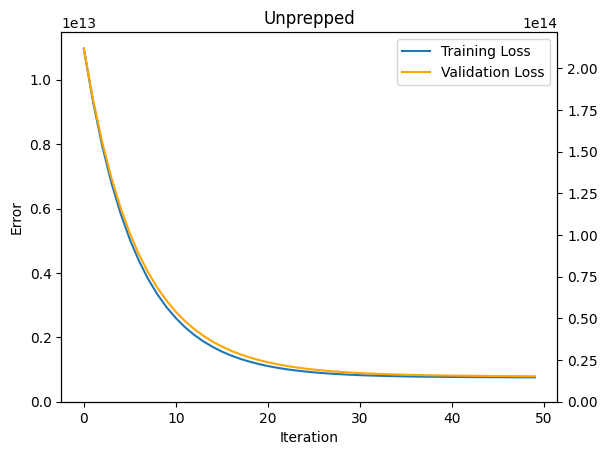

In [129]:
factors_list : list[str] = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
iterations = 50
alpha = 0.08

x = np.ones((m, 1))
test_x = np.ones((test_m, 1))

for factor in factors_list:
    temp = np.array(train_df[factor])
    temp = temp.reshape(m, 1)
    x = np.hstack((x, temp))
    temp = np.array(test_df[factor])
    temp = temp.reshape(test_m, 1)
    test_x = np.hstack((test_x, temp))

j, validation_loss = linear_regression(factors_list, iterations, x, y, alpha, m, test_x, test_y)
plot(j, validation_loss, 'Unprepped')

### Part B

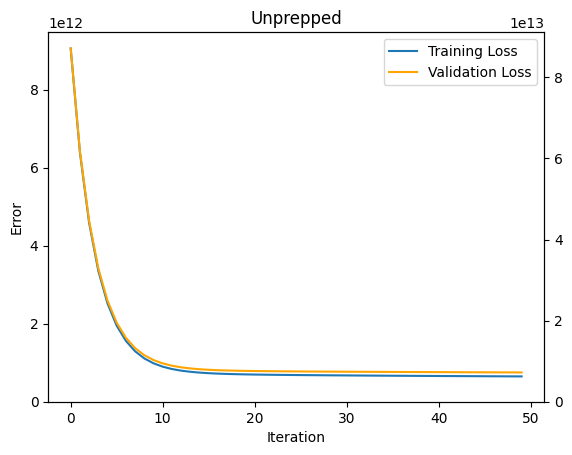

In [131]:
factors_list : list[str] = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 
                            'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
                            'parking', 'prefarea']
iterations = 50
alpha = 0.08

x = np.ones((m, 1))
test_x = np.ones((test_m, 1))

for factor in factors_list:
    temp = np.array(train_df[factor])
    temp = temp.reshape(m, 1)
    x = np.hstack((x, temp))
    temp = np.array(test_df[factor])
    temp = temp.reshape(test_m, 1)
    test_x = np.hstack((test_x, temp))

j, validation_loss = linear_regression(factors_list, iterations, x, y, alpha, m, test_x, test_y)
plot(j, validation_loss, 'Unprepped')

# Problem 2
---

## Normalized Data

In [113]:
df = prep_data('N')

train_df, test_df = train_test_split(df, test_size=0.2, random_state=15)

y = np.array(train_df.pop('price'))

test_y = np.array(test_df.pop('price'))

m = len(y)
test_m = len(test_y)

### Part A

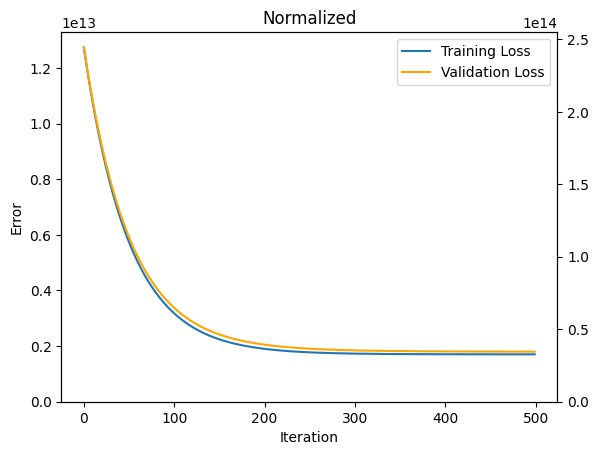

In [114]:
factors_list : list[str] = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
iterations = 500
alpha = 0.01

x = np.ones((m, 1))
test_x = np.ones((test_m, 1))

for factor in factors_list:
    temp = np.array(train_df[factor])
    temp = temp.reshape(m, 1)
    x = np.hstack((x, temp))
    temp = np.array(test_df[factor])
    temp = temp.reshape(test_m, 1)
    test_x = np.hstack((test_x, temp))

j, validation_loss = linear_regression(factors_list, iterations, x, y, alpha, m, test_x, test_y)
plot(j, validation_loss, 'Normalized')

### Part B

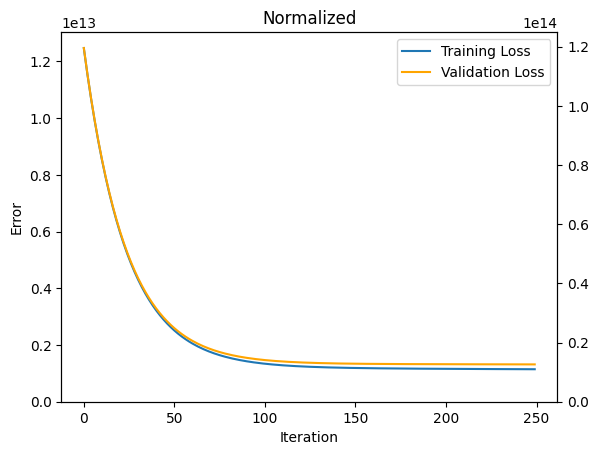

In [115]:
factors_list : list[str] = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 
                            'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
                            'parking', 'prefarea']
iterations = 250
alpha = 0.01

x = np.ones((m, 1))
test_x = np.ones((test_m, 1))

for factor in factors_list:
    temp = np.array(train_df[factor])
    temp = temp.reshape(m, 1)
    x = np.hstack((x, temp))
    temp = np.array(test_df[factor])
    temp = temp.reshape(test_m, 1)
    test_x = np.hstack((test_x, temp))

j, validation_loss = linear_regression(factors_list, iterations, x, y, alpha, m, test_x, test_y)
plot(j, validation_loss, 'Normalized')

## Standardization

In [116]:
df = prep_data('S')
train_df, test_df = train_test_split(df, test_size=0.2, random_state=15)

y = np.array(train_df.pop('price'))

test_y = np.array(test_df.pop('price'))

m = len(y)
test_m = len(test_y)

### Part A

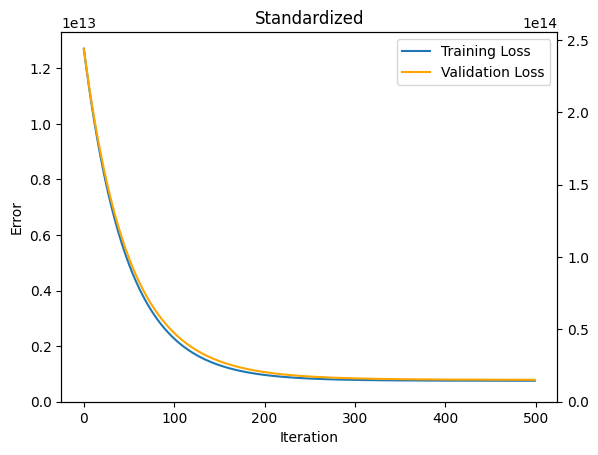

In [117]:
factors_list : list[str] = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
iterations = 500
alpha = 0.01

x = np.ones((m, 1))
test_x = np.ones((test_m, 1))

for factor in factors_list:
    temp = np.array(train_df[factor])
    temp = temp.reshape(m, 1)
    x = np.hstack((x, temp))
    temp = np.array(test_df[factor])
    temp = temp.reshape(test_m, 1)
    test_x = np.hstack((test_x, temp))

j, validation_loss = linear_regression(factors_list, iterations, x, y, alpha, m, test_x, test_y)
plot(j, validation_loss, 'Standardized')

### Part B

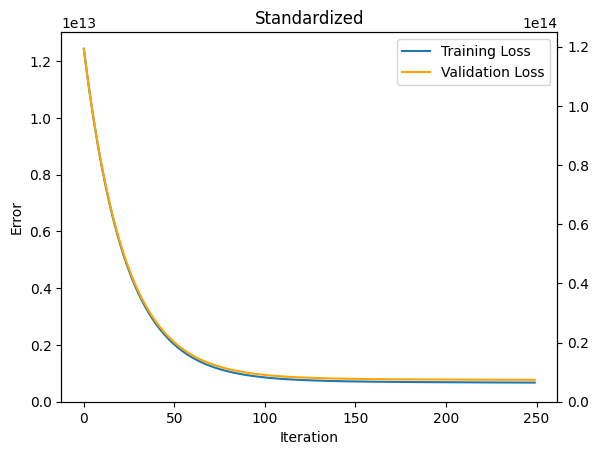

In [118]:
factors_list : list[str] = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 
                            'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
                            'parking', 'prefarea']
iterations = 250
alpha = 0.01

x = np.ones((m, 1))
test_x = np.ones((test_m, 1))

for factor in factors_list:
    temp = np.array(train_df[factor])
    temp = temp.reshape(m, 1)
    x = np.hstack((x, temp))
    temp = np.array(test_df[factor])
    temp = temp.reshape(test_m, 1)
    test_x = np.hstack((test_x, temp))

j, validation_loss = linear_regression(factors_list, iterations, x, y, alpha, m, test_x, test_y)

plot(j, validation_loss, 'Standardized')

# Problem 3
---

## Normalized Data

In [119]:
df = prep_data('N')

train_df, test_df = train_test_split(df, test_size=0.2, random_state=15)

y = np.array(train_df.pop('price'))

test_y = np.array(test_df.pop('price'))

m = len(y)
test_m = len(test_y)

### Part A

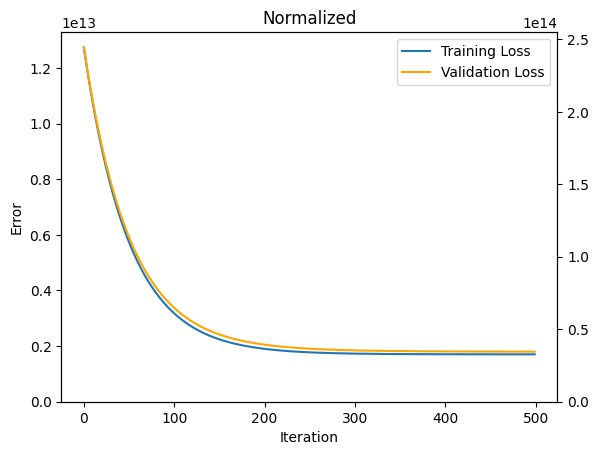

In [120]:
factors_list : list[str] = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
iterations = 500
alpha = 0.01

x = np.ones((m, 1))
test_x = np.ones((test_m, 1))

for factor in factors_list:
    temp = np.array(train_df[factor])
    temp = temp.reshape(m, 1)
    x = np.hstack((x, temp))
    temp = np.array(test_df[factor])
    temp = temp.reshape(test_m, 1)
    test_x = np.hstack((test_x, temp))

j, validation_loss = linear_regression(factors_list, iterations, x, y, alpha, m, test_x, test_y)
plot(j, validation_loss, 'Normalized')

### Part B

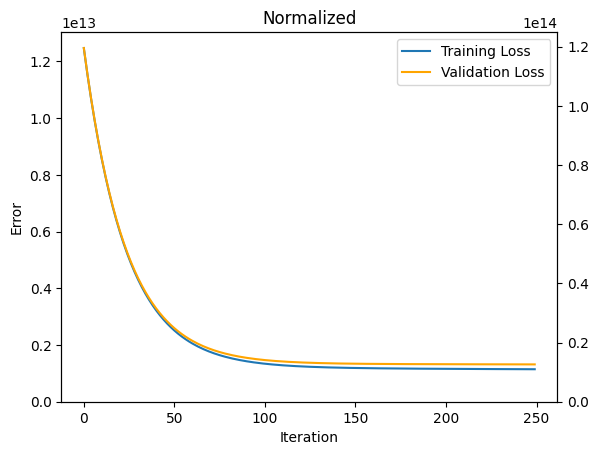

In [121]:
factors_list : list[str] = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 
                            'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
                            'parking', 'prefarea']
iterations = 250
alpha = 0.01

x = np.ones((m, 1))
test_x = np.ones((test_m, 1))

for factor in factors_list:
    temp = np.array(train_df[factor])
    temp = temp.reshape(m, 1)
    x = np.hstack((x, temp))
    temp = np.array(test_df[factor])
    temp = temp.reshape(test_m, 1)
    test_x = np.hstack((test_x, temp))

j, validation_loss = linear_regression(factors_list, iterations, x, y, alpha, m, test_x, test_y)
plot(j, validation_loss, 'Normalized')

## Standardization

In [122]:
df = prep_data('S')
train_df, test_df = train_test_split(df, test_size=0.2, random_state=15)

y = np.array(train_df.pop('price'))

test_y = np.array(test_df.pop('price'))

m = len(y)
test_m = len(test_y)

### Part A

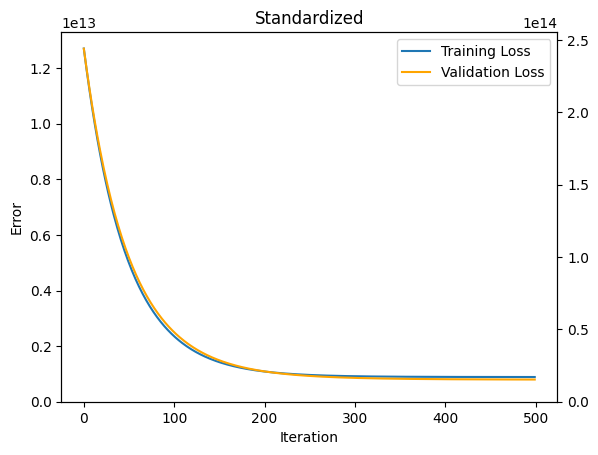

In [123]:
factors_list : list[str] = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
iterations = 500
alpha = 0.01
penalty = 5

x = np.ones((m, 1))
test_x = np.ones((test_m, 1))

for factor in factors_list:
    temp = np.array(train_df[factor])
    temp = temp.reshape(m, 1)
    x = np.hstack((x, temp))
    temp = np.array(test_df[factor])
    temp = temp.reshape(test_m, 1)
    test_x = np.hstack((test_x, temp))

j, validation_loss = linear_regression(factors_list, iterations, x, y, alpha, m, test_x, test_y, penalty)
plot(j, validation_loss, 'Standardized')

### Part B

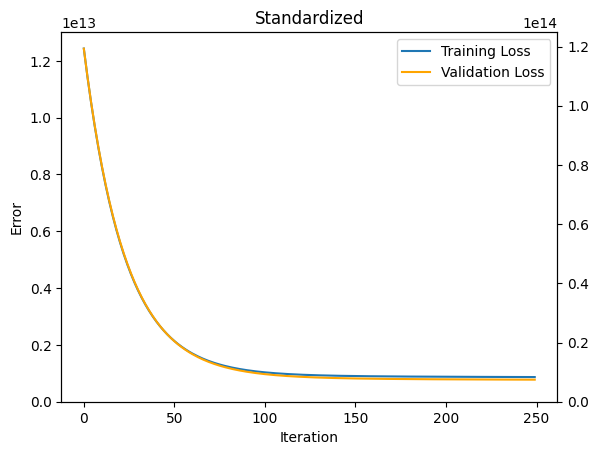

In [124]:
factors_list : list[str] = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 
                            'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
                            'parking', 'prefarea']
iterations = 250
alpha = 0.01

x = np.ones((m, 1))
test_x = np.ones((test_m, 1))

for factor in factors_list:
    temp = np.array(train_df[factor])
    temp = temp.reshape(m, 1)
    x = np.hstack((x, temp))
    temp = np.array(test_df[factor])
    temp = temp.reshape(test_m, 1)
    test_x = np.hstack((test_x, temp))

j, validation_loss = linear_regression(factors_list, iterations, x, y, alpha, m, test_x, test_y, 15)

plot(j, validation_loss, 'Standardized')